# Задание 8. Дискриминантный анализ

In [1]:
library(MASS)

INZc = read.csv(file = 'data/INZc.csv', sep = ';' )



names(INZc)
attach(INZc)
str(INZc)

[1] "Район"       "Эйфаузиевые" "Амфиподы"    "Копеподы"    "Декаподы"   
 [6] "Птероподы"   "Ойкоплевры"  "Сагиты"      "Нектон"      "ИНЖ"        
[11] "Размер"

'data.frame':	17 obs. of  11 variables:
 $ Район      : Factor w/ 3 levels "БерМоре","Залив_Петра_Великого",..: 2 2 2 2 2 3 3 3 3 3 ...
 $ Эйфаузиевые: Factor w/ 16 levels "0,1","10","11,7",..: 9 1 4 3 5 15 7 8 10 11 ...
 $ Амфиподы   : Factor w/ 14 levels "0","0,1","10,1",..: 1 5 5 14 10 12 3 6 2 8 ...
 $ Копеподы   : Factor w/ 16 levels "0","0,1","1,1",..: 3 13 9 14 4 10 12 11 7 2 ...
 $ Декаподы   : Factor w/ 8 levels "0","0,3","0,4",..: 1 1 6 8 1 1 4 2 4 1 ...
 $ Птероподы  : Factor w/ 12 levels "0","12,2","13,7",..: 1 1 11 4 9 2 3 6 10 5 ...
 $ Ойкоплевры : Factor w/ 5 levels "0","0,1","0,3",..: 1 1 1 1 1 1 1 1 1 2 ...
 $ Сагиты     : Factor w/ 7 levels "0","0,1","0,2",..: 1 1 5 3 1 1 1 2 1 1 ...
 $ Нектон     : Factor w/ 16 levels "0","1,5","1,6",..: 16 15 5 3 14 9 10 8 12 13 ...
 $ ИНЖ        : int  21 11 51 24 151 70 112 149 151 160 ...
 $ Размер     : int  20 25 30 32 35 36 38 40 43 45 ...


In [21]:
INZc.pca = princomp(INZc[2:11])

#typeof(INZc[2:11])
#scale(INZc[2:11])

#plot(INZc.pca)
# на графике видно что нибольший вклад вносят первый 6 компонента 

ERROR: Error in cov.wt(z): 'x' must contain finite values only


In [10]:
INZc.p = predict(INZc.pca) 

plot(INZc.p[,2:7], type = 'n', xlab ='PC1', ylab = 'PC2')

text(INZc.p[,2:7], labels = abbreviate(INZc[,1],2,method = "both") )

# на рис видем b_ - (Залив_Петра_Великого) ; sk - (Сахалин); br - (БерМоре)

biplot(INZc.pca)

loadings(INZc.pca)

ERROR: Error in predict(INZc.pca): объект 'INZc.pca' не найден


In [4]:
#дискриминантный анализ 
in1 = INZc[seq(1, nrow(INZc),1),]

in2 = INZc[-seq(1, nrow(INZc), 5),]

in.lda = lda(in1[,2:11], in1[,1])

in.ldap = predict(in.lda, in2[,2:11])$class 



table(in.ldap, in2[,1])
# in.ldap                  bay_of_peter_the_great bermore sakhalin
# bay_of_peter_the_great                      4       0        0
# bermore                                     0       5        0
# sakhalin                                    0       0        4

#из результата видно что все виды рыб привильно классифицированы!

ERROR: Error in FUN(x, aperm(array(STATS, dims[perm]), order(perm)), ...): нечисловой аргумент для бинарного оператора


In [5]:
summary(in.ldap)
in.lda
in.ldap

in.ldap = predict(in.lda,in2[,2:11])
in.ldap

#in.ldap$svd

ldam = manova(as.matrix(in2[,2:11])~in.ldap$class)
summary(ldam, test = 'Wilks')

#                Df     Wilks approx F num Df den Df Pr(>F)
# in.ldap$class  2 0.0015167   2.4677     20      2 0.3278
# Residuals     10      

#видим что значение Wilks очень близка к нулю - значит что классификация хорошая
# p = 0.3278<0,05 - говорит о достоверности между группами 

#визуалируем данные через дискриминатный анализ 
in.lda2 = lda(in1[,2:11],in1[,1])

in.ldap2 = predict(in.lda2, in2[,2:11])$x

plot(in.ldap2, type = 'n', xlab = 'LD1', ylab = "LD2")

text(in.ldap2, labels = abbreviate(INZc[,1],2,method = "both"))

ERROR: Error in summary(in.ldap): объект 'in.ldap' не найден


In [ ]:
#----------------------------------------------------------------
#Тот же итог мы получим и при проведении скользящего контроля:

LDA.INZcCV = lda(district ~ ., data = INZc,  CV = TRUE)
(table(Факт = INZc$district, Прогноз = LDA.INZcCV$class))

Acc = mean(LDA.INZcCV$class == INZc$district)
paste("Точность=", round(100*Acc, 2), "%", sep = "")    


## Пример

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4
4.6,3.4,1.4,0.3
5.0,3.4,1.5,0.2
4.4,2.9,1.4,0.2
4.9,3.1,1.5,0.1


[1] 150

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


Call:
lda(ir1[, 1:4], ir1[, 5])

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa
10,4.9,3.1,1.5,0.1,setosa
12,4.8,3.4,1.6,0.2,setosa
13,4.8,3.0,1.4,0.1,setosa


            
ir.ldap      setosa versicolor virginica
  setosa         40          0         0
  versicolor      0         39         1
  virginica       0          1        39

setosa versicolor  virginica 
        40         40         40

Call:
lda(ir1[, 1:4], ir1[, 5])

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     versicolor versicolor
 [43] versicolor versicolor versicolor versicolor versicolor versicolor
 [49] versicolor versicolor versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] virginica  versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor virginica  virginica  virginica  virginica 
 [85] virginica  virginica  virginica  virginica  virginica  virginica 
 [91] virginica  virginica  virginica  virginica  virginica  virginica 
 [97] virginica  virginica  virginica  virginica  virginica  virginica 
[103] virginica  virginica  virginica  virginica  versicolor virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

,setosa,versicolor,virginica
2,1,7.217970e-18,5.042143e-37
3,1,1.463849e-19,4.675932e-39
4,1,1.268536e-16,3.566610e-35
5,1,1.637387e-22,1.082605e-42
7,1,1.113469e-18,2.302608e-37
8,1,3.877586e-20,1.074496e-39
9,1,1.902813e-15,9.482936e-34
10,1,1.111803e-18,2.724060e-38
12,1,1.621649e-18,1.833201e-37
13,1,1.459225e-18,3.262506e-38


               Df    Wilks approx F num Df den Df    Pr(>F)    
ir.ldap$class   2 0.023592   157.05      8    228 < 2.2e-16 ***
Residuals     117                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

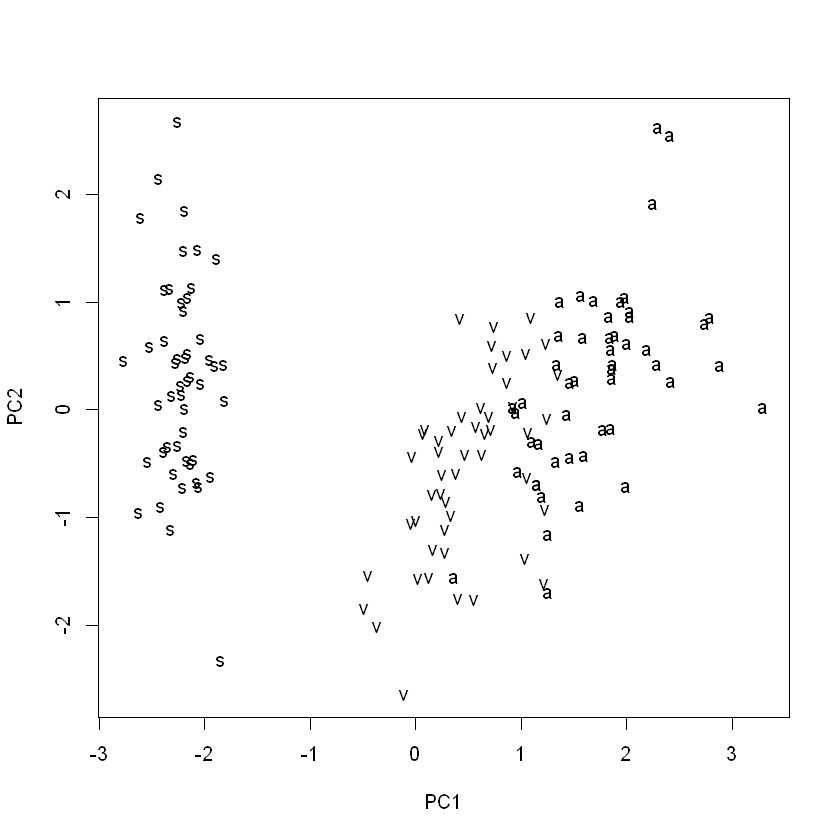

,LD1,LD2
Sepal.Length,0.8293776,0.02410215
Sepal.Width,1.5344731,2.16452123
Petal.Length,-2.2012117,-0.93192121
Petal.Width,-2.8104603,2.83918785


[1] 48.642644  4.579983

[1] 0.991212605 0.008787395

,LD1,LD2
Sepal.Length,0.6867795,0.01995817
Sepal.Width,0.6688251,0.94344183
Petal.Length,-3.8857950,-1.64511887
Petal.Width,-2.1422387,2.16413593


            Прогноз
Факт         setosa versicolor virginica
  setosa         50          0         0
  versicolor      0         48         2
  virginica       0          1        49

[1] "Точность=98%"

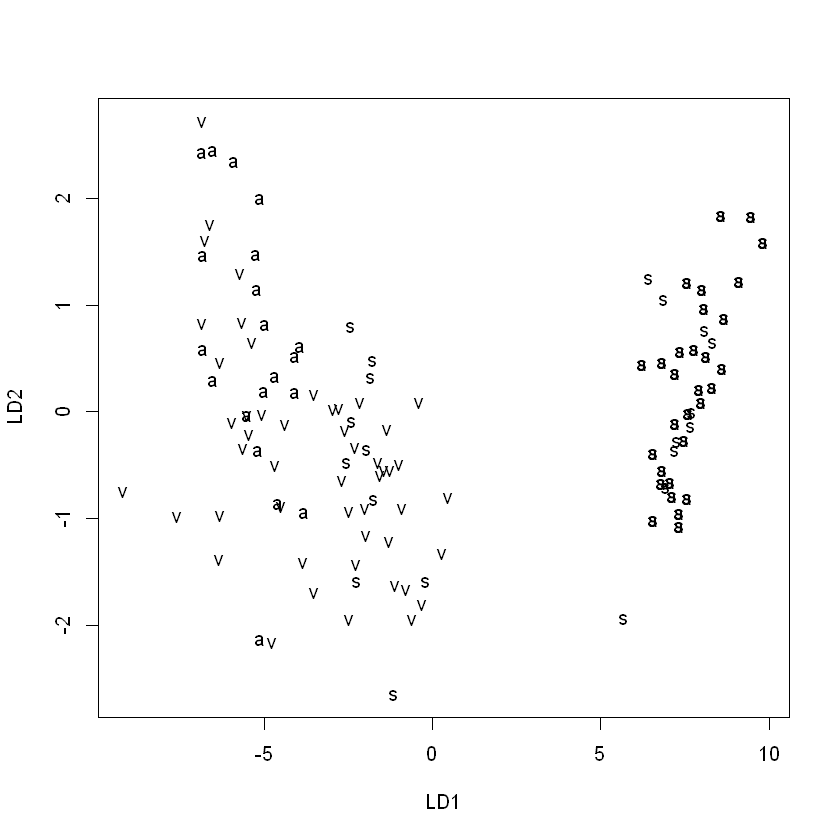

In [6]:
library(MASS)

iris

iris[,1:4]

iris.pca = princomp(scale(iris[,1:4]))

iris.p = predict(iris.pca)

plot(iris.p[,1:2], type = 'n', xlab ='PC1', ylab = 'PC2')
text(iris.p[,1:2], labels = abbreviate(iris[,5],1, method = 'both.sides'))

ir1 = iris[seq(1, nrow(iris),1),]
nrow(iris)
ir1

ir.lda = lda(ir1[,1:4], ir1[,5])
ir.lda


ir2 = iris[-seq(1, nrow(iris), 5),]

ir2

ir.ldap = predict(ir.lda, ir2[,1:4])$class

table(ir.ldap, ir2[,5])

summary(ir.ldap)

ir.lda
ir.ldap

ir.ldap = predict(ir.lda, ir2[,1:4])
ir.ldap

ldam = manova(as.matrix(ir2[,1:4])~ir.ldap$class)
summary(ldam, test = 'Wilks')

ir.lda2 = lda(ir1[,1:4], ir1[,5])
ir.ldap2 = predict(ir.lda2,ir2[,1:4])$x
plot(ir.ldap2, type = 'n', xlab = 'LD1', ylab = 'LD2')
text(ir.ldap2, labels = abbreviate(iris[,5],1,method = 'both'))

require(MASS)
LDA.iris <- lda(formula = Species ~ ., data = iris)
LDA.iris$scaling # Коэффициенты линейных дискриминантов
LDA.iris$svd
(prop = LDA.iris$svd^2/sum(LDA.iris$svd^2)) 

prop <- scales::percent(prop)
pred <- predict(LDA.iris, newdata = iris)
scores <- data.frame(Species = iris$Species, pred$x)

lda(scale(iris[, 1:4]), gr = iris$Species)$scaling

LDA.irisCV <- lda(Species ~ ., data = iris,  CV = TRUE)
(table(Факт = iris$Species, Прогноз = LDA.irisCV$class))

Acc <- mean(LDA.irisCV$class == iris$Species)
paste("Точность=", round(100*Acc, 2), "%", sep = "")           
